In [1]:
import pandas as pd
import numpy as np

In [21]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
data = pd.read_csv ('monthly-milk-production.csv', ';', index_col = ['month'],parse_dates = ['month'], dayfirst = True)

In [14]:
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [17]:
data.describe()

,milk
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


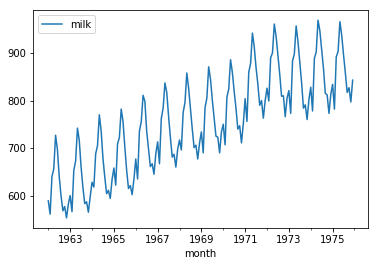

In [23]:
data.plot()

In [24]:
import statsmodels.api as sm

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
sm.tsa.stattools.adfuller(data.milk)

(-1.3038115874221343,
 0.6274267086030294,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [31]:
data2 = pd.DataFrame (data.milk/data.index.days_in_month)

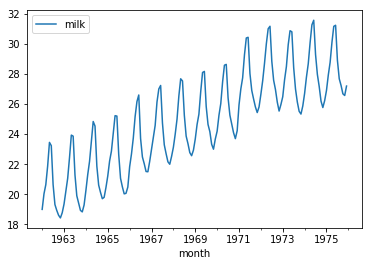

In [35]:
data2.plot()

In [38]:
round (data2.sum(),2)

4166.33

In [50]:
(data2.milk - data2.milk.shift(1)).dropna()

month
1962-02-01    1.035714
1962-03-01    0.609447
1962-04-01    1.221505
1962-05-01    1.584946
1962-06-01   -0.218280
1962-07-01   -2.588172
1962-08-01   -1.322581
1962-09-01   -0.389247
1962-10-01   -0.320430
1962-11-01   -0.179570
1962-12-01    0.340860
1963-01-01    0.580645
1963-02-01    0.859447
1963-03-01    0.850230
1963-04-01    1.368817
1963-05-01    1.502151
1963-06-01   -0.068817
1963-07-01   -2.576344
1963-08-01   -1.387097
1963-09-01   -0.469892
1963-10-01   -0.497849
1963-11-01   -0.102151
1963-12-01    0.456989
1964-01-01    0.967742
1964-02-01    1.052280
1964-03-01    0.883204
1964-04-01    1.306452
1964-05-01    1.338710
1964-06-01   -0.305376
1964-07-01   -2.662366
                ...   
1973-07-01   -2.380645
1973-08-01   -1.419355
1973-09-01   -0.866667
1973-10-01   -0.617204
1973-11-01   -0.182796
1973-12-01    0.537634
1974-01-01    0.838710
1974-02-01    1.076037
1974-03-01    0.891705
1974-04-01    1.389247
1974-05-01    1.191398
1974-06-01    0.308602
1974-

In [80]:
data3_season = (data2 - data2.shift(12)).dropna()
data3_sea_simple = (data3_season - data3_season.shift(1)).dropna() 
sm.tsa.stattools.adfuller(data3_sea_simple.milk)[1]

2.2808455518037347e-06

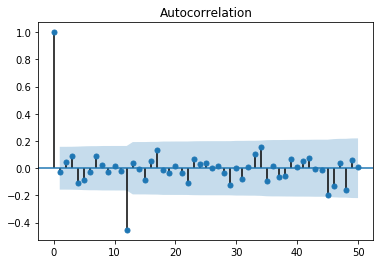

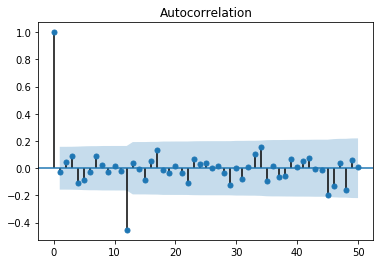

In [88]:
sm.graphics.tsa.plot_acf(data3_sea_simple.values.squeeze(), lags = 50)

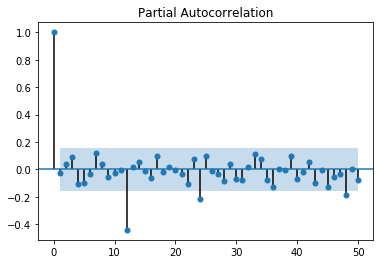

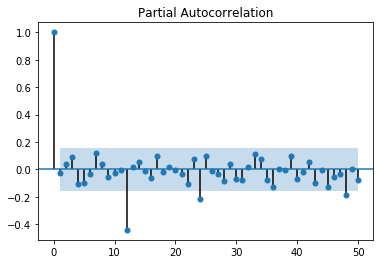

In [89]:
sm.graphics.tsa.plot_pacf(data3_sea_simple.values.squeeze(), lags = 50)

In [91]:
import statsmodels

In [92]:
statsmodels.__version__

'0.8.0'